#**Question 2: Concrete Crack Image Classification**










##**Problem Statement:**
A Binary Image Classification problem is solved by building and training a model by deep ANN. The same model is also trained by CNN so that, we can analyse or compare these two models and find out which model gives us more accurate output.

###**Expected Outcome:**
The model should be able to classify the images in 2 different classes.

There should be an improvement in accuracy.

We need to find out which model is fast.

We need to find out which model can extract more imporatant features and is more robust.


##**Dataset Description:**
The dataset contains concrete images having cracks. The data is collected from various
METU Campus Buildings.
The dataset is divided into two as negative and positive crack images for image
classification. Each class has 20000images with a total of 40000 images with 227 x 227
pixels with RGB channels. The dataset is generated from 458 high-resolution images
(4032x3024 pixel) with the method proposed by Zhang et al (2016).
High-resolution images have variance in terms of surface finish and illumination
conditions. No data augmentation in terms of random rotation or flipping is applied.

Link to the Dataset: 

URL: https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/code

In [52]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from random import randint

In [53]:
#Install Kaggle
!pip install -q kaggle

In [54]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nishitanamdeo","key":"a307b56a7a439550b3912671146d2014"}'}

In [55]:
# create a Kaggle Forlder
!mkdir -p ~/.kaggle
# copy the kaggle.json file to folder created 
!cp kaggle.json ~/.kaggle

In [56]:
!kaggle datasets download -d arnavr10880/concrete-crack-images-for-classification

concrete-crack-images-for-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
import zipfile
zip_ref = zipfile.ZipFile('/content/concrete-crack-images-for-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [58]:
import glob
negative = glob.glob('/content/Negative/*.*')
positive = glob.glob('/content/Positive/*.*')

In [59]:
data = []
labels = []

In [60]:
for i in positive:   
    image=tf.keras.preprocessing.image.load_img(i,target_size= (28,28))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in negative:   
    image=tf.keras.preprocessing.image.load_img(i,target_size=(28,28))
    image=np.array(image)
    data.append(image)
    labels.append(1)

In [61]:
Data = np.array(data)
Labels = np.array(labels)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data, Labels, test_size=0.2)

In [63]:
classes = ["positive","negative"]

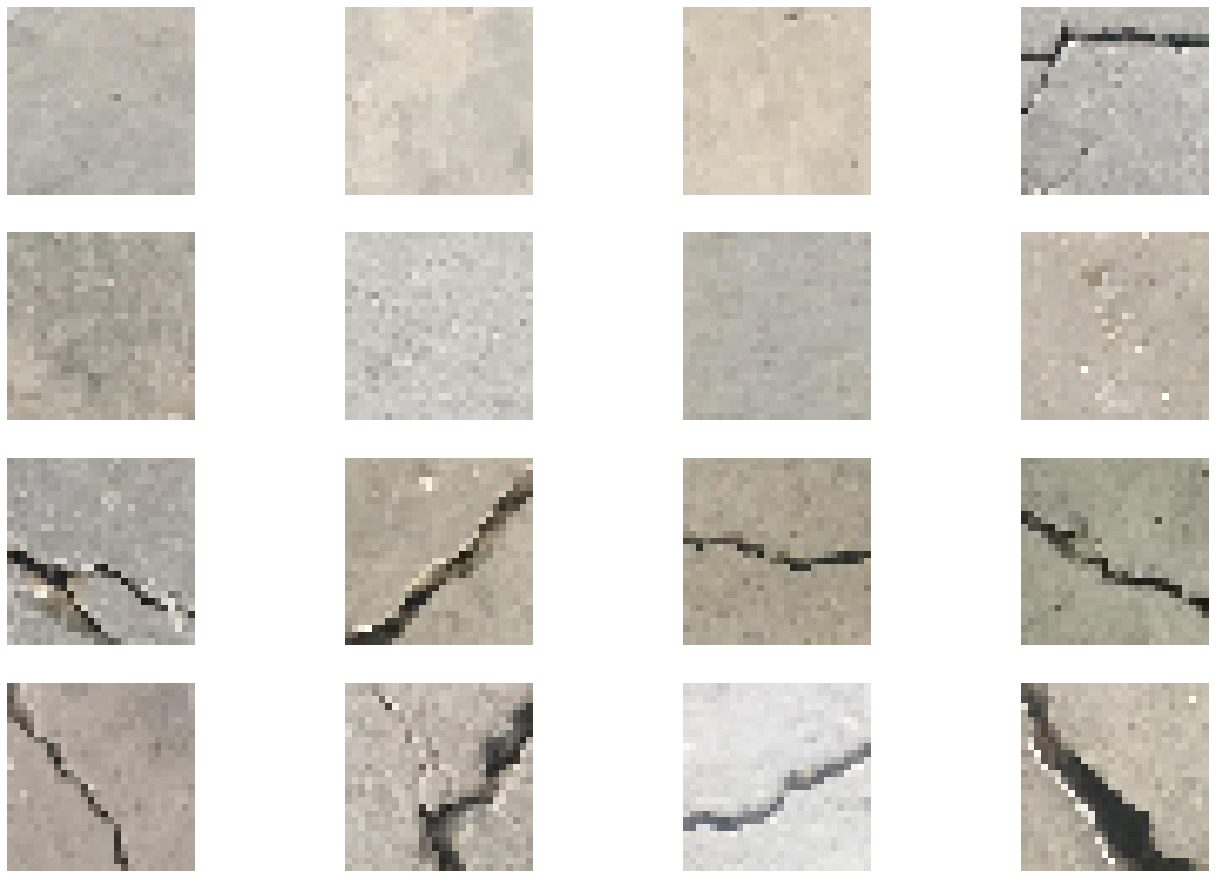

In [64]:
f,ax = plt.subplots(4,4) 

f.subplots_adjust(0,0,3,3)
for i in range(0,4,1):
    for j in range(0,4,1):
        rnd_number = randint(0,len(X_train))
        ax[i,j].imshow(X_train[rnd_number])
        ax[i,j].axis('off')

In [65]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

32000 train samples
8000 test samples


In [66]:
X_train.shape

(32000, 28, 28, 3)

In [67]:
X_test.shape

(8000, 28, 28, 3)

In [85]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [86]:
#ANN Model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28,3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.layers

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2352)              0         
                                                                 
 dense_11 (Dense)            (None, 300)               705900    
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 2)                 202       
                                                                 
Total params: 736,202
Trainable params: 736,202
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
1000/1000 [==============================] - 16s 15ms/step - loss: 0.4825 - accuracy: 0.7630 - val_loss: 0.3834 - val_accuracy: 0.8326
Epoch 2/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.3417 - accuracy: 0.8534 - val_loss: 0.2879 - val_accuracy: 0.8839
Epoch 3/5
1000/1000 [==============================] - 15s 15ms/step - loss: 0.3043 - accuracy: 0.8748 - val_loss: 0.4013 - val_accuracy: 0.8210
Epoch 4/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.2922 - accuracy: 0.8808 - val_loss: 0.3427 - val_accuracy: 0.8482
Epoch 5/5
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2596 - accuracy: 0.8979 - val_loss: 0.2744 - val_accuracy: 0.8921


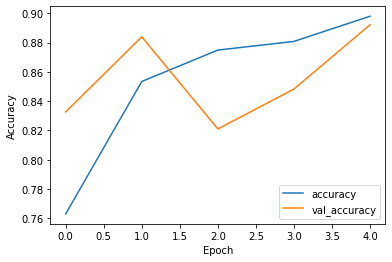

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.7, 1])
plt.legend(loc='best')

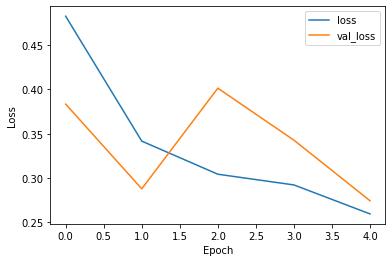

In [73]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [74]:
predicted = model.predict(X_test)

250/250 [==============================] - 2s 6ms/step


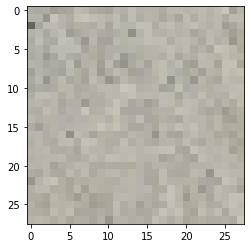

 Real label : negative
 Predicted label: negative


In [75]:
ind = 9
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',classes[np.argmax(y_test[ind])])
print(' Predicted label:',classes[np.argmax(predicted[ind])])

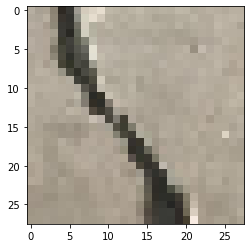

 Real label : positive
 Predicted label: positive


In [84]:
ind = 100
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',classes[np.argmax(y_test[ind])])
print(' Predicted label:',classes[np.argmax(predicted[ind])])

#Second Method: CNN Model

In [76]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

two = Sequential()
two.add(Conv2D(32, (3,3), input_shape= (28,28,3), activation = 'relu', padding = 'same'))
two.add(MaxPooling2D())

two.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
two.add(MaxPooling2D())

two.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
two.add(MaxPooling2D())

two.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
two.add(MaxPooling2D())

two.add(Flatten())

two.add(Dense(256, activation='relu'))
two.add(Dropout(0.3))
two.add(Dense(2, activation = 'sigmoid'))
two.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [77]:
two.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 128)       

In [78]:
history_two = two.fit(X_train, y_train, epochs= 5, validation_data=(X_test, y_test))

Epoch 1/5
1000/1000 [==============================] - 102s 100ms/step - loss: 0.0570 - accuracy: 0.9789 - val_loss: 0.0298 - val_accuracy: 0.9901
Epoch 2/5
1000/1000 [==============================] - 98s 98ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0159 - val_accuracy: 0.9950
Epoch 3/5
1000/1000 [==============================] - 104s 104ms/step - loss: 0.0219 - accuracy: 0.9937 - val_loss: 0.0219 - val_accuracy: 0.9924
Epoch 4/5
1000/1000 [==============================] - 104s 104ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0129 - val_accuracy: 0.9961
Epoch 5/5
1000/1000 [==============================] - 102s 102ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0087 - val_accuracy: 0.9979


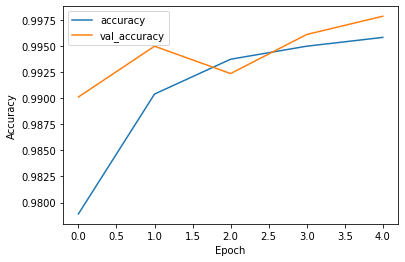

In [79]:
plt.plot(history_two.history['accuracy'], label='accuracy')
plt.plot(history_two.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

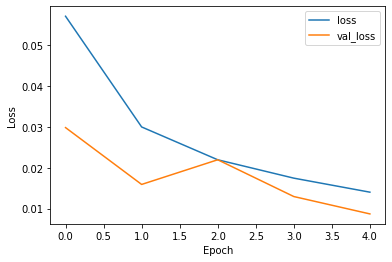

In [80]:
plt.plot(history_two.history['loss'], label='loss')
plt.plot(history_two.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [81]:
predicted2 = two.predict(X_test)

250/250 [==============================] - 5s 20ms/step


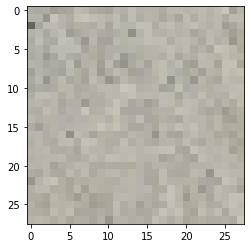

 Real label : negative
 Predicted label: negative


In [82]:
#Prediction: 1
ind = 9
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',classes[np.argmax(y_test[ind])])
print(' Predicted label:',classes[np.argmax(predicted[ind])])

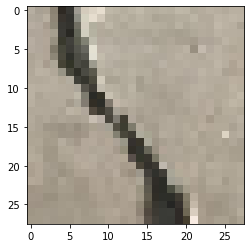

 Real label : positive
 Predicted label: positive


In [83]:
#Prediction: 2
ind = 100
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',classes[np.argmax(y_test[ind])])
print(' Predicted label:',classes[np.argmax(predicted[ind])])

#**Conclusion:**

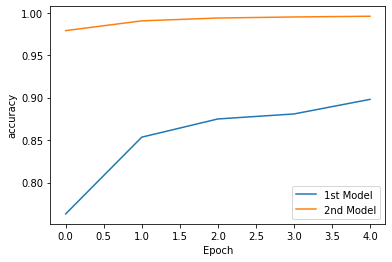

In [87]:
plt.plot(history.history['accuracy'], label='1st Model')
plt.plot(history_two.history['accuracy'], label='2nd Model')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')

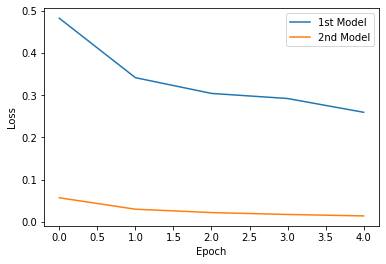

In [88]:
plt.plot(history.history['loss'], label='1st Model')
plt.plot(history_two.history['loss'], label='2nd Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

###Again from the above plots we can clearly observe that our second model is more accurate than the first model. The CNN model is more accurate, fast, requires less preprocessing and, is more spatially aware than ANN.





#####*(Spatial: CNNs can learn to recognize features in an image regardless of their position in the image, leading to spatial invariance. This means that if the same feature is present in different parts of the image, the CNN can recognize it regardless of its location.) 